# Proyek Analisis Data: Bike Sharing

* Nama: Andy Kho
* Email: andykho2003@gmail.com
* ID Dicoding: andykho

# Menentukan Pertanyaan Bisnis

* Pertanyaan 1 : Bagaimana perbedaan penyewaan sepeda antara Registered dan Casual?
* Pertanyaan 2 : Jam berapa yang memiliki permintaan tertinggi untuk penyewaan sepeda?
* Pertanyaan 3 : Pada musim apa penyewaan sepeda paling tinggi dan paling rendah?

# Import Semua Packages/Library yang Digunakan

In [58]:
# Import library yang diperlukan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
from scipy import stats

# Data Wrangling

## Gathering Data

In [59]:
# read dataset day.csv
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
# read dataset hour.csv
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

In [61]:
# Cek tipe data
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [62]:
# Cek value pada data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [63]:
# Cek value pada data
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [64]:
# Cek jumlah data duplikat
print("Jumlah data yang terduplikat: ", hour_df.duplicated().sum())
print("Jumlah data yang terduplikat: ", day_df.duplicated().sum())

Jumlah data yang terduplikat:  0
Jumlah data yang terduplikat:  0


Tidak ada data yang terduplikat

In [65]:
# Cek jumlah missing value dataset hour_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [66]:
# Cek jumlah missing value dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value di dataset day dan hour

## Cleaning Data

* Menghapus / Drop kolom instant
* Mengubah tipe data dteday dari 'object' menjadi 'datetime'
* Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
* Ubah nama kolom pada kedua dataframe agar mudah dipahami
* Ubah value kolom pada kedua data frame agar mudah dipahami

In [67]:
# Drop kolom 'instant'
hour_df.drop(['instant'],axis = 1, inplace = True)
day_df.drop(['instant'],axis = 1, inplace = True)

In [ ]:
# menampilkan 5 baris pertama dari setiap kolom
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [69]:
# Mengubah tipe data dteday dari 'object' menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [70]:
# Ubah tipe data int menjadi category pada column berikut
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns :
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

In [71]:
# Ubah nama kolom pada kedua dataframe agar mudah dipahami
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'weekday','cnt':'count_df'},inplace=True)
hour_df.rename(columns={'yr':'year', 'hr' : 'hours' , 'mnth':'month','weekday':'weekday','cnt':'count_df'},inplace=True)

In [72]:
# Ubah value kolom pada data frame agar mudah dipahami

day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

C:\Users\andyk\AppData\Local\Temp\ipykernel_24596\3601531519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\andyk\AppData\Local\Temp\ipykernel_24596\3601531519.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.

In [73]:
# save dataframe yang sudah di melewati proses cleaning ke folder dashboard
day_df.to_csv('dashboard/day_dboard.csv', index=False)
hour_df.to_csv('dashboard/hour_dboard.csv', index=False)

# Exploratory Data Analysis (EDA)

Explore day_df

In [ ]:
day_df.describe(include="all")

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_df
count,731,731,731,731,731.0,731,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,0.0,Sunday,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [75]:
# melihat jumlah penyewaan tiap season
day_df.groupby(by="season").count_df.sum().sort_values(ascending=False).reset_index().head(10)

C:\Users\andyk\AppData\Local\Temp\ipykernel_24596\655739234.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").count_df.sum().sort_values(ascending=False).reset_index().head(10)


,season,count_df
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Season Fall merupakan musim dimana penyewaan terjadi paling banyak , sedangkan Spring paling sedikit

In [76]:
# Melihat jumlah penyewaan sepeda pada pengguna registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Pada tahun 2011 dan 2012 , lebih banyak pengguna registered yang menyewa sepeda daripada casual

Explore hour_df

In [77]:
hour_df.describe(include="all")

,dteday,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count_df
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2.0,7,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jul,NaN,0.0,Saturday,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [78]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_df": ["sum"]
})

,count_df
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Sepeda paling banyak disewa pada jam ke-17

Sepeda paling sedikit disewa pada jam ke-4

# Visualization & Explanatory Analysis

## Pertanyaan 1:

* Bagaimana perbedaan penyewaan sepeda antara Registered dan Casual?

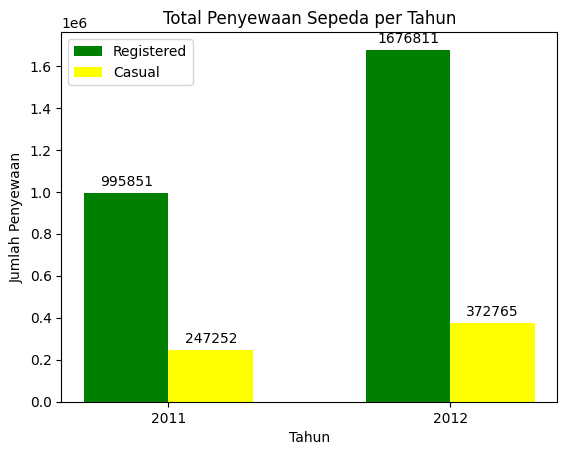

In [79]:
years = [2011, 2012]
total_registered = [995851, 1676811]
total_casual = [247252, 372765]

bar_width = 0.3
x = range(len(years))

plt.bar(x, total_registered, width=bar_width, color="green", label='Registered')
plt.bar([p + bar_width for p in x], total_casual, width=bar_width, color="yellow", label='Casual')


plt.title('Total Penyewaan Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan')

# angka diatas bar
for i in range(len(years)):
    plt.text(i, total_registered[i] + 20000, total_registered[i], ha='center', va='bottom')
    plt.text(i + bar_width, total_casual[i] + 20000, total_casual[i], ha='center', va='bottom')

# tahun 2011 dan 2012 di sumbu x
plt.xticks([i + bar_width / 2 for i in x], years)

plt.legend()
plt.show()


Berdasarkan gambar diatas , kita dapat melihat bahwa penyewaan sepeda pada pengguna Registered lebih banyak daripada pengguna Casual pada kedua tahun yaitu sebanyak 995.851 pengguna Registered , 247.252 pengguna Casual di tahun 2011 , dan sebanyak 1.676.811 pengguna Registered , 372.765 pengguna Casual di tahun 2012

## Pertanyaan 2:

* Jam berapa yang memiliki permintaan tertinggi untuk penyewaan sepeda?

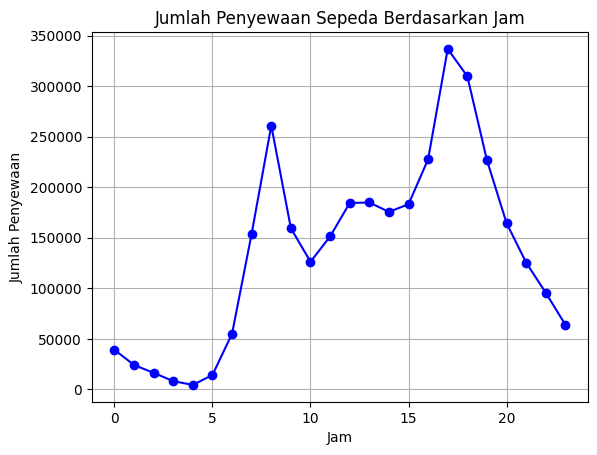

In [80]:
hours = list(range(0,24))
rentals = [39130, 24164, 16352, 8174, 4428, 14261, 55132, 154171, 261001, 159438, 126257, 151320,
           184414, 184919, 175652, 183149, 227748, 336860, 309772, 226789, 164550, 125445, 95612, 63941]

# line plot
plt.plot(hours, rentals,marker='o', color='blue')

# judul dan label
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

plt.grid(True)
plt.show()

Dari chart tersebut kita dapat melihat bahwa penyewaan sepeda lebih banyak pada sekitar jam 8 dan paling banyak ada pada jam 17. Sedangkan untuk penyewaan sepeda paling sedikit ada pada jam 4. Kita juga bisa menyimpulkan bahwa penyewaan sepeda lebih sedikit pada dini hingga pagi hari , dan lebih banyak pada siang sampai sore , lalu menurun ketika malam hari.

# Conclusion

* Kesimpulan pertanyaan 1 : Jumlah penyewaan sepeda terlihat dipengaruhi oleh pengguna Registered dan Casual , yang dimana Registered memiliki penyewa lebih banyak pada tahun 2011 dan 2012 yaitu 995.851 dan 1.676.811 , sedangkan pengguna Casual lebih sedikit di tahun 2011 dan 2012 yaitu sejumlah 247.252 dan 372.765
* Kesimpulan pertanyaan 2 : Jam yang memiliki permintaan penyewaan tertinggi ada pada jam 17 , dan paling sedikit pada jam 4.